#**ROBOTALK 2024**

#YOLOv7 Workshop

---

# **Dependencies**

Επιλογή GPU στο runtime:

Runtime --> Change Runtime Type --> Hardware accelerator --> GPU

In [1]:
# Clone YOLOv7 repository
!git clone https://github.com/WongKinYiu/yolov7

Cloning into 'yolov7'...
remote: Enumerating objects: 1197, done.
remote: Total 1197 (delta 0), reused 0 (delta 0), pack-reused 1197
Receiving objects: 100% (1197/1197), 74.23 MiB | 19.92 MiB/s, done.
Resolving deltas: 100% (519/519), done.


In [ ]:
# Install requirements
%cd yolov7
!pip install -r requirements.txt

# **File Access**



In [1]:
%cd yolov7

/content/yolov7


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# save files to drive -> /content/...
!cp -r  source destination

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving noisy_priority.png to noisy_priority.png


# **Pre-trained models**


In [ ]:
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-tiny.pt

# **Flags**

  **--weights**  *Path για το μοντέλο (.pt)*
  
  **--source** *Path για την εικόνα (0 -> webcam)*
  
  **--conf-thres** *Confidence-Threshold*

In [11]:
!python3 detect.py --weights yolov7-tiny.pt --conf-thres 0.25 --source /content/drive/MyDrive/robotalk_workshop/horses.jpg

Namespace(weights=['yolov7-tiny.pt'], source='/content/drive/MyDrive/robotalk_workshop/horses.jpg', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.2.1+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

Fusing layers... 
/usr/local/lib/python3.10/dist-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 200 layers, 6219709 parameters, 229245 gradients, 13.7 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

5 horses, Done. (4.9ms) Inference, (629.9ms) NMS
 The image with the result is s

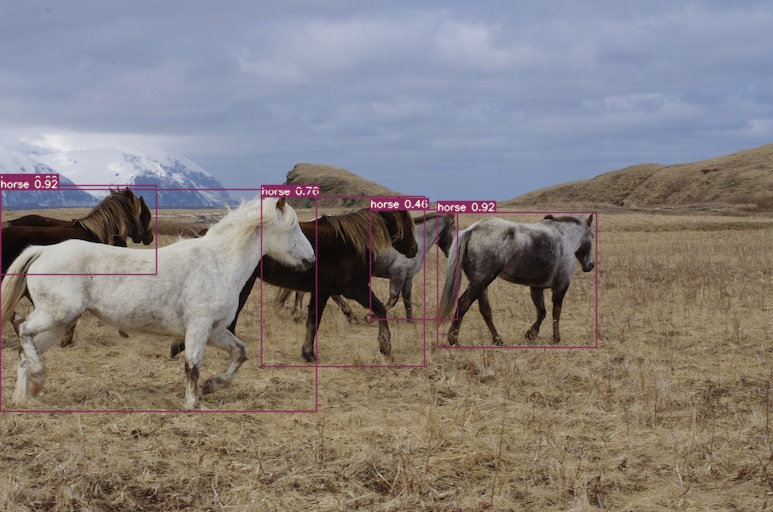

In [12]:
from IPython.display import Image
display(Image("runs/detect/exp3/horses.jpg", width=400, height=400))

# **Model Training**

# **Dataset**

Επιλογή dataset από το [roboflow](https://universe.roboflow.com/):

[Dataset](https://universe.roboflow.com/new-workspace-tcsnq/bfmc-q9wuj/)

Download this dataset -> Yolov7 pytorch format -> show download code (check) -> copy - paste στο jupyter notebook:



In [ ]:
!pip install roboflow

In [1]:
%cd yolov7

/content/yolov7


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="gJqbct5Fj1aodAFWjUoR")
project = rf.workspace("new-workspace-tcsnq").project("bfmc-q9wuj")
version = project.version(1)
dataset = version.download("yolov7")

# **Flags**

--weights, Path για το pre-trained model (default value: 'yolo7.pt')

--cfg, Πληροφορίες για το μοντέλο (configuration file)

--data, Πληροφορίες για το dataset (configuration file)

--epochs, Αριθμός περασμάτων από το σύνολο του dataset (default value: 300)

--batch-size, Δεδομένα που επεξεργάζονται πριν από αλλαγή στα βάρη (default value: 16)

In [ ]:
!python3 train.py --batch-size 16 --epochs 55 --weights 'yolov7-tiny.pt' --cfg cfg/training/yolov7-tiny.yaml --data BFMC-1/data.yaml

# **Evaluation**

# **Έλεγχος: Εικόνες από το dataset**

In [2]:
%cd yolov7

/content/yolov7


In [3]:
!python3 detect.py --weights /content/drive/MyDrive/robotalk_workshop/tiny_16/best.pt --conf 0.1 --source BFMC-1/test/images

Namespace(weights=['/content/drive/MyDrive/robotalk_workshop/tiny_16/best.pt'], source='BFMC-1/test/images', img_size=640, conf_thres=0.1, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.2.1+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

Fusing layers... 
IDetect.fuse
/usr/local/lib/python3.10/dist-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 208 layers, 6040068 parameters, 0 gradients, 13.1 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

1 crosswalk, Done. (7.0ms) Inference, (614.5ms) NMS
 The image w

In [ ]:
#display inference on all test images

import glob
from IPython.display import Image, display

i = 0
for imageName in glob.glob('runs/detect/exp4/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")
    i = i + 1

# **Testing**

In [7]:
!python3 detect.py --weights /content/drive/MyDrive/robotalk_workshop/tiny_16/best.pt --conf 0.1 --source /content/drive/MyDrive/robotalk_workshop/Signs/stop.png

Namespace(weights=['/content/drive/MyDrive/robotalk_workshop/tiny_16/best.pt'], source='/content/drive/MyDrive/robotalk_workshop/Signs/stop.png', img_size=640, conf_thres=0.1, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.2.1+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

Fusing layers... 
IDetect.fuse
/usr/local/lib/python3.10/dist-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 208 layers, 6040068 parameters, 0 gradients, 13.1 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

1 stop, Done. (4.9ms) Infer

In [ ]:
!python3 detect.py --weights /content/drive/MyDrive/robotalk_workshop/tiny_16/best.pt --conf 0.1 --source /content/drive/MyDrive/robotalk_workshop/Signs/stop.png

Namespace(weights=['/content/drive/MyDrive/robotalk_workshop/tiny_16/epoch_024.pt'], source='/content/drive/MyDrive/robotalk_workshop/Signs/stop.png', img_size=640, conf_thres=0.1, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.2.1+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

Fusing layers... 
IDetect.fuse
/usr/local/lib/python3.10/dist-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 208 layers, 6040068 parameters, 0 gradients, 13.1 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

1 car, 1 highway_entry

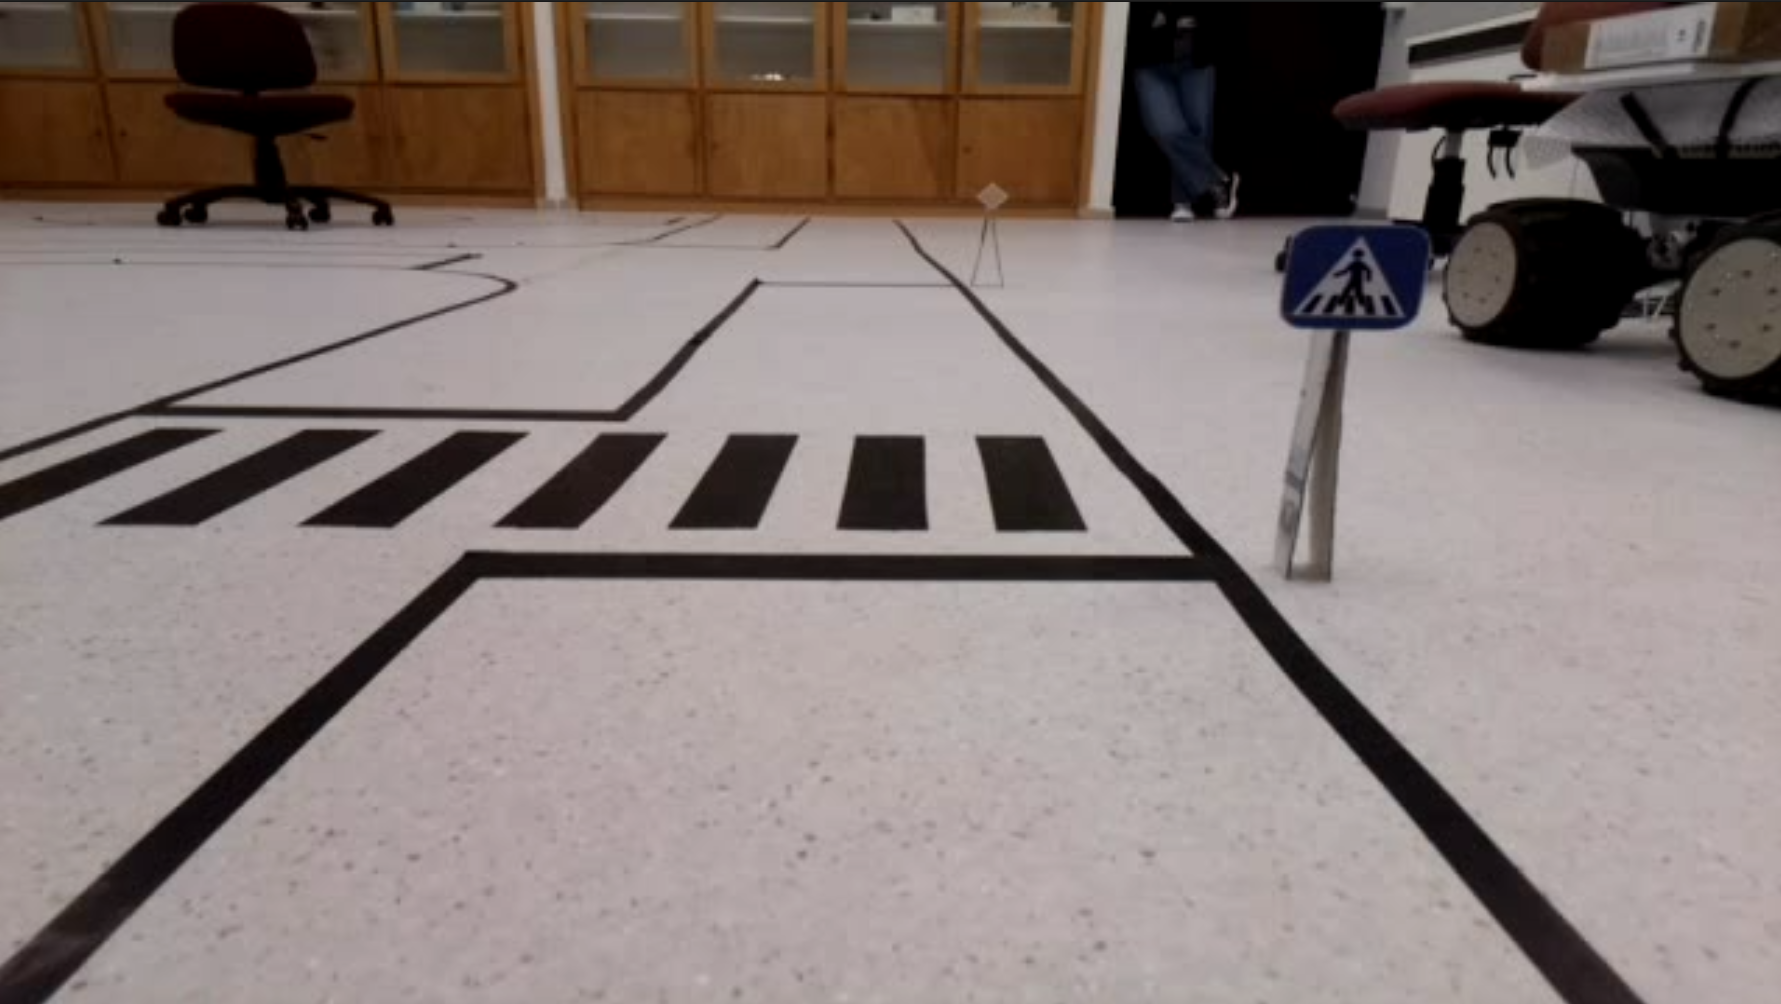